## import dataset ##

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Fitur_LBPuniform_Ikan.csv')

df.head()

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,cat_24,cat_25,category
0,9323,7670,3810,2313,1690,1450,1390,1744,1818,2246,...,2088,1870,2251,2286,3249,4540,6821,12954,104300,0
1,8820,7629,3669,2388,1623,1531,1343,1646,1785,2211,...,1909,1810,2111,2218,3125,4585,6945,12943,105986,0
2,13101,6905,5009,3260,2465,1954,1690,1602,1610,1676,...,1692,1725,2019,2310,3281,4908,6899,13322,111351,0
3,12866,6717,5054,3392,2559,1972,1826,1736,1708,1882,...,1769,1856,2091,2523,3399,4871,6825,13230,109851,0
4,8157,6292,2910,1899,1423,1301,1084,1453,1767,2447,...,2172,1586,1908,2458,3705,5406,5382,13690,95304,0


In [2]:
df["category"].value_counts()

7    577
5    564
6    544
0    500
4    331
3    252
1    240
2    240
Name: category, dtype: int64

## Preprocessing ##

### check missing value ###

In [3]:
print("check null = ",  df.isnull().sum().sum())

check null =  0


### data visualization ### 

In [4]:

# # Pair-wise Scatter Plots
# import seaborn as sns
# cols = ["cat_0","cat_1","cat_2","cat_3","cat_4","cat_5","cat_6","cat_7","cat_8","cat_9","cat_10","cat_11","cat_12","cat_13","cat_14","cat_15","cat_16","cat_17","cat_18","cat_19","cat_20","cat_21","cat_22","cat_23","cat_24","cat_25","category"]
# pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
#                   plot_kws=dict(edgecolor="k", linewidth=0.5),
#                   diag_kind="kde", diag_kws=dict(shade=True))

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

### fixing outlier ###

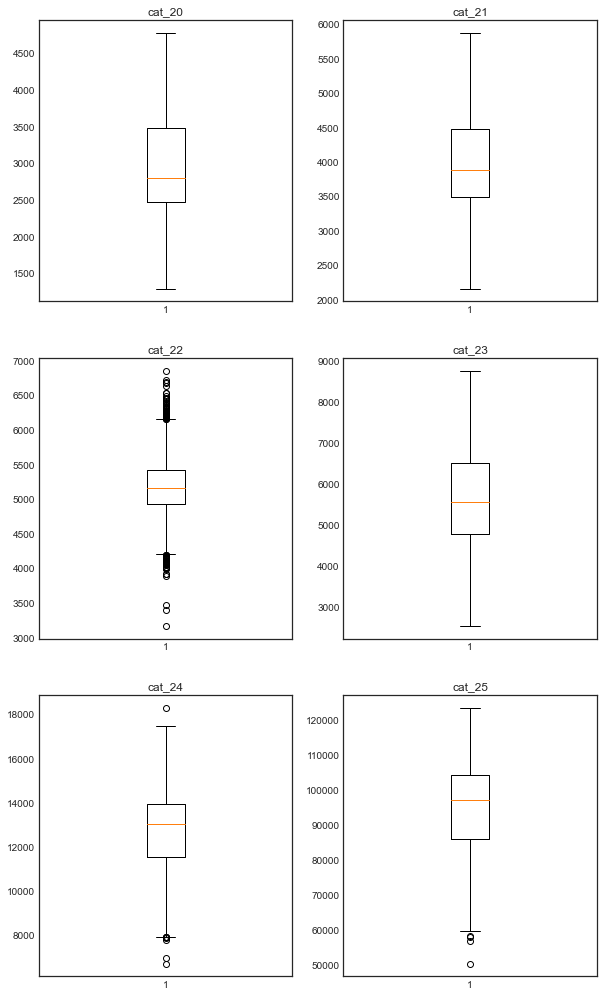

In [5]:
cols = ["cat_0","cat_1","cat_2","cat_3","cat_4","cat_5","cat_6","cat_7","cat_8","cat_9","cat_10","cat_11","cat_12","cat_13","cat_14","cat_15","cat_16","cat_17","cat_18","cat_19","cat_20","cat_21","cat_22","cat_23","cat_24","cat_25","category"]

import matplotlib.pyplot as plt
plt.figure(figsize = (10, 30))
plt.style.use('seaborn-white')

for x in range (20,26):
    index = x%10
    ax=plt.subplot(5,2,index+1) 
    plt.boxplot(df[cols[x]])
    ax.set_title(cols[x])

In [6]:
dfFixOutliers = df

outlierframe =['cat_9','cat_10','cat_11','cat_12','cat_12','cat_13','cat_17','cat_18','cat_19','cat_22','cat_24','cat_25']
for cols in outlierframe :
    Q1 = dfFixOutliers[cols].quantile(0.25)
    Q3 = dfFixOutliers[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (dfFixOutliers[cols] >= Q1 - 1.5 * IQR) & (dfFixOutliers[cols] <= Q3 + 1.5 *IQR)
    dfFixOutliers=dfFixOutliers.loc[filter]

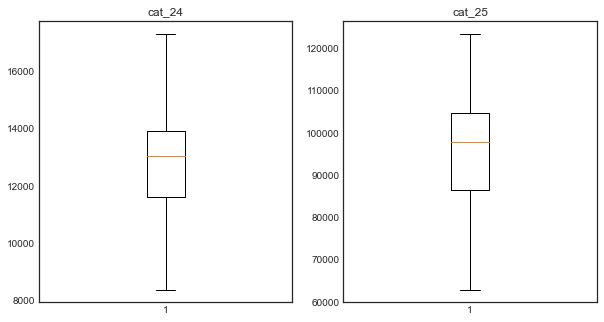

In [7]:

import matplotlib.pyplot as plt
plt.figure(figsize = (10, 30))
plt.style.use('seaborn-white')

# for x in range (0,10): 
for x in range (10,12): 
    index = x%10
    ax=plt.subplot(5,2,index+1)
    plt.boxplot(dfFixOutliers[outlierframe[x]])
    ax.set_title(outlierframe[x])
    

### Normalize Data ###

In [8]:
from sklearn.preprocessing import StandardScaler
d_pre = dfFixOutliers
variable_cat2 = ["cat_0","cat_1","cat_2","cat_3","cat_4","cat_5","cat_6","cat_7","cat_8","cat_9","cat_10","cat_11","cat_12","cat_13","cat_14","cat_15","cat_16","cat_17","cat_18","cat_19","cat_20","cat_21","cat_22","cat_23","cat_24","cat_25"]
d_pre[variable_cat2] = StandardScaler().fit_transform(d_pre[variable_cat2])
d_pre

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,cat_24,cat_25,category
0,-0.980142,1.557762,-1.134152,-1.482144,-1.273575,-1.194822,-0.996246,-0.673919,-0.730094,-0.576136,...,-0.558060,-0.601064,-0.431706,-0.982956,-1.157560,-1.799805,1.076145,0.039481,0.679935,0
1,-1.248937,1.522809,-1.345525,-1.393379,-1.349129,-1.095365,-1.055516,-0.800330,-0.770404,-0.613393,...,-0.824485,-0.690527,-0.640220,-1.080771,-1.363526,-1.673845,1.192847,0.032540,0.817749,0
2,1.038764,0.905593,0.663269,-0.361342,-0.399633,-0.575981,-0.617926,-0.857086,-0.984167,-1.182897,...,-1.147469,-0.817265,-0.777244,-0.948433,-1.104407,-0.769732,1.149554,0.271705,1.256284,0
3,0.913184,0.745321,0.730728,-0.205116,-0.293632,-0.553879,-0.446421,-0.684238,-0.864460,-0.963612,...,-1.032862,-0.621939,-0.670008,-0.642041,-0.908407,-0.873299,1.079910,0.213649,1.133674,0
4,-1.603234,0.383004,-2.483341,-1.972125,-1.574663,-1.377773,-1.382133,-1.049283,-0.792391,-0.362173,...,-0.433034,-1.024520,-0.942566,-0.735541,-0.400136,0.624224,-0.278157,0.503928,-0.055398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,-0.114973,0.770044,-0.506029,-0.414601,-0.551868,-0.616500,-0.728900,-0.808070,-0.901105,-0.924225,...,-0.663737,-0.902255,-0.716179,-0.876510,-0.278882,0.923729,0.838037,1.911783,0.786115,7
3244,-0.046037,0.910708,0.170065,-0.154225,-0.506761,-0.741742,-0.836090,-0.920292,-0.925535,-0.960418,...,-0.802159,-0.841122,-0.826394,-0.585941,-0.212441,1.575922,1.038500,1.403794,0.785380,7
3245,-0.769594,-0.278543,-0.798353,-0.383829,-0.144780,-0.238319,-0.134937,-0.045733,0.043118,0.031690,...,0.117677,-0.358024,-0.239575,-0.102619,-0.117763,0.002822,-0.263098,-0.129638,0.175027,7
3246,-0.145967,0.429040,-0.612465,-0.461942,-0.613890,-0.573525,-0.543523,-0.676499,-0.610387,-0.698553,...,-0.628015,-0.875416,-0.877033,-0.591695,-0.278882,0.680207,0.573576,1.216375,0.544737,7


### x y partition ###

In [9]:
x=df.drop(['category'],axis=1)

y=df['category']
y

0       0
1       0
2       0
3       0
4       0
       ..
3243    7
3244    7
3245    7
3246    7
3247    7
Name: category, Length: 3248, dtype: int64

## Spliting DataSet ##

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=1)
print("Input Training:",x.shape)
print("Input Training:",x_train.shape)
print("Input Test:",x_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (3248, 26)
Input Training: (2598, 26)
Input Test: (650, 26)
Output Training: (2598,)
Output Test: (650,)


### Over Fiting ###

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# define oversampling strategy

x=d_pre.drop(['category'],axis=1)

y=d_pre['category']
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=1)
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))
print("Input Training:",x.shape)

After oversampling:  Counter({6: 457, 7: 457, 0: 457, 5: 457, 3: 457, 4: 457, 1: 457, 2: 457})
Input Training: (3057, 26)


## Modeling Selection ##

- hasil data Tanpa normalisasi 
- hasil data dengan Normalisasi
- hasil dataNormalisasi + imbalanced yg nambah

menggunakan model : 

### GaussianNB ###

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)
y_pred = nbtrain.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.18      0.26        84
           1       0.17      0.51      0.25        41
           2       0.18      0.70      0.29        46
           3       0.12      0.28      0.16        40
           4       0.22      0.41      0.29        68
           5       0.08      0.01      0.02       117
           6       0.40      0.02      0.03       115
           7       0.19      0.08      0.11       101

    accuracy                           0.19       612
   macro avg       0.23      0.27      0.18       612
weighted avg       0.25      0.19      0.14       612



In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = nbtrain.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.18      0.27        84
           1       0.16      0.56      0.25        41
           2       0.19      0.67      0.30        46
           3       0.18      0.40      0.25        40
           4       0.20      0.46      0.28        68
           5       0.08      0.01      0.02       117
           6       0.50      0.02      0.03       115
           7       0.22      0.06      0.09       101

    accuracy                           0.20       612
   macro avg       0.26      0.29      0.19       612
weighted avg       0.28      0.20      0.15       612



### SVM ###

In [14]:
# normal
from sklearn.metrics import classification_report
from sklearn import svm
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = svm.SVC()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)
y_pred = nbtrain.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.52      0.66        84
           1       0.71      0.83      0.76        41
           2       0.45      0.72      0.55        46
           3       0.40      0.20      0.27        40
           4       0.41      0.35      0.38        68
           5       0.73      0.81      0.77       117
           6       0.52      0.52      0.52       115
           7       0.41      0.48      0.44       101

    accuracy                           0.57       612
   macro avg       0.56      0.55      0.54       612
weighted avg       0.58      0.57      0.56       612



In [15]:
# overfit
from sklearn.metrics import classification_report
from sklearn import svm
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = svm.SVC()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = nbtrain.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.61      0.72        84
           1       0.66      0.85      0.74        41
           2       0.39      0.80      0.53        46
           3       0.35      0.70      0.47        40
           4       0.34      0.59      0.43        68
           5       0.86      0.67      0.75       117
           6       0.61      0.47      0.53       115
           7       0.65      0.22      0.33       101

    accuracy                           0.56       612
   macro avg       0.60      0.61      0.56       612
weighted avg       0.64      0.56      0.57       612



### Decision Tree

In [16]:
# normal
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = DecisionTreeClassifier(random_state=0)
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)
y_pred = nbtrain.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66        84
           1       0.60      0.66      0.63        41
           2       0.51      0.57      0.54        46
           3       0.25      0.30      0.27        40
           4       0.36      0.31      0.33        68
           5       0.66      0.65      0.66       117
           6       0.54      0.57      0.55       115
           7       0.39      0.39      0.39       101

    accuracy                           0.52       612
   macro avg       0.50      0.51      0.50       612
weighted avg       0.52      0.52      0.52       612



In [17]:
# overfit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = DecisionTreeClassifier(random_state=0)
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = nbtrain.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.55      0.59        84
           1       0.49      0.68      0.57        41
           2       0.46      0.54      0.50        46
           3       0.24      0.33      0.28        40
           4       0.33      0.41      0.36        68
           5       0.68      0.49      0.57       117
           6       0.58      0.63      0.61       115
           7       0.41      0.32      0.36       101

    accuracy                           0.49       612
   macro avg       0.48      0.49      0.48       612
weighted avg       0.51      0.49      0.50       612



### knn ###

In [18]:
# normal
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  
from sklearn.neighbors import KNeighborsClassifier

for i in range (1,20) :
    # Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
    modelnb = KNeighborsClassifier(n_neighbors=i)
    # Memasukkan data training pada fungsi klasifikasi Naive Bayes
    nbtrain = modelnb.fit(x_train, y_train)
    y_pred = nbtrain.predict(x_test)
    print(str(i) + " neighbors accuracy : " + str(accuracy_score(y_test, y_pred)))

1 neighbors accuracy : 0.619281045751634
2 neighbors accuracy : 0.6062091503267973
3 neighbors accuracy : 0.6029411764705882
4 neighbors accuracy : 0.6241830065359477
5 neighbors accuracy : 0.6241830065359477
6 neighbors accuracy : 0.6356209150326797
7 neighbors accuracy : 0.6209150326797386
8 neighbors accuracy : 0.619281045751634
9 neighbors accuracy : 0.6258169934640523
10 neighbors accuracy : 0.6176470588235294
11 neighbors accuracy : 0.6127450980392157
12 neighbors accuracy : 0.619281045751634
13 neighbors accuracy : 0.6176470588235294
14 neighbors accuracy : 0.6143790849673203
15 neighbors accuracy : 0.619281045751634
16 neighbors accuracy : 0.6143790849673203
17 neighbors accuracy : 0.6127450980392157
18 neighbors accuracy : 0.5980392156862745
19 neighbors accuracy : 0.5964052287581699


In [19]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = KNeighborsClassifier(n_neighbors=6)
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)
y_pred = nbtrain.predict(x_test)
print(str(i) + " neighbors accuracy : " + str(accuracy_score(y_test, y_pred)))

19 neighbors accuracy : 0.6356209150326797


In [20]:
# overfit
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = KNeighborsClassifier(n_neighbors=6)
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = nbtrain.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        84
           1       0.72      0.83      0.77        41
           2       0.54      0.87      0.67        46
           3       0.24      0.55      0.34        40
           4       0.39      0.59      0.47        68
           5       0.84      0.65      0.73       117
           6       0.67      0.52      0.59       115
           7       0.60      0.24      0.34       101

    accuracy                           0.58       612
   macro avg       0.60      0.62      0.58       612
weighted avg       0.64      0.58      0.59       612



### ANN

In [21]:
# normal
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=10,kernel_initializer='uniform' , activation='tanh' , input_dim=26))
classifier.add(Dense(units=6,kernel_initializer='uniform' , activation='tanh'))
classifier.add(Dense(units=1 , kernel_initializer='uniform' , activation='sigmoid'))
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
classifier.fit(x_train, y_train, batch_size = 50, epochs = 100)

Epoch 1/100
49/49 [==============================] - 1s 3ms/step - loss: 0.5567 - accuracy: 0.1027
Epoch 2/100
49/49 [==============================] - 0s 3ms/step - loss: -0.0487 - accuracy: 0.1121
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: -1.5492 - accuracy: 0.1080
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: -3.8946 - accuracy: 0.0822
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: -6.1870 - accuracy: 0.0806
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: -8.0621 - accuracy: 0.0806
Epoch 7/100
49/49 [==============================] - 0s 5ms/step - loss: -9.6526 - accuracy: 0.0806
Epoch 8/100
49/49 [==============================] - 0s 3ms/step - loss: -11.0874 - accuracy: 0.0806
Epoch 9/100
49/49 [==============================] - 0s 4ms/step - loss: -12.4210 - accuracy: 0.0806
Epoch 10/100
49/49 [==============================] - 0s 4ms/step - loss: -13.6943 - accuracy: 0.08

In [22]:
from sklearn.metrics import classification_report

y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred, zero_division=0))

20/20 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        84
           1       0.07      1.00      0.13        41
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        68
           5       0.00      0.00      0.00       117
           6       0.00      0.00      0.00       115
           7       0.00      0.00      0.00       101

    accuracy                           0.11       612
   macro avg       0.13      0.16      0.07       612
weighted avg       0.14      0.11      0.07       612



In [23]:
# Defining a function for finding best hyperparameters
def FunctionFindBestParams(X_train, y_train):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[15, 20, 25, 50]
    epoch_list=[25, 50, 100]
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
 
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10,kernel_initializer='uniform' , activation='tanh' , input_dim=26))
            classifier.add(Dense(units=6,kernel_initializer='uniform' , activation='tanh'))
            classifier.add(Dense(units=1 , kernel_initializer='uniform' , activation='sigmoid'))
            classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
 
# Calling the function
ResultsData = FunctionFindBestParams(x_train, y_train)

1 Parameters: batch_size: 15 - epochs: 25 Accuracy: 0.11329243332147598
2 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.11492842435836792
3 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.11411043256521225
4 Parameters: batch_size: 20 - epochs: 25 Accuracy: 0.11738241463899612
5 Parameters: batch_size: 20 - epochs: 50 Accuracy: 0.12392637878656387
6 Parameters: batch_size: 20 - epochs: 100 Accuracy: 0.11492842435836792
7 Parameters: batch_size: 25 - epochs: 25 Accuracy: 0.11533742398023605
8 Parameters: batch_size: 25 - epochs: 50 Accuracy: 0.1231083869934082
9 Parameters: batch_size: 25 - epochs: 100 Accuracy: 0.11002045124769211
10 Parameters: batch_size: 50 - epochs: 25 Accuracy: 0.10715746134519577
11 Parameters: batch_size: 50 - epochs: 50 Accuracy: 0.11901840567588806
12 Parameters: batch_size: 50 - epochs: 100 Accuracy: 0.12597137689590454


In [24]:
# overfit
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=10,kernel_initializer='uniform' , activation='tanh' , input_dim=26))
classifier.add(Dense(units=6,kernel_initializer='uniform' , activation='tanh'))
classifier.add(Dense(units=1 , kernel_initializer='uniform' , activation='sigmoid'))
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
classifier.fit(X_train_SMOTE, y_train_SMOTE, batch_size = 50, epochs = 100)

Epoch 1/100
74/74 [==============================] - 1s 2ms/step - loss: 0.4649 - accuracy: 0.1433
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: -0.8309 - accuracy: 0.1313
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: -3.6571 - accuracy: 0.1269
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: -6.3535 - accuracy: 0.1250
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: -8.3862 - accuracy: 0.1250
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: -10.1197 - accuracy: 0.1250
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: -11.7128 - accuracy: 0.1250
Epoch 8/100
74/74 [==============================] - 0s 2ms/step - loss: -13.2165 - accuracy: 0.1250
Epoch 9/100
74/74 [==============================] - 0s 2ms/step - loss: -14.6647 - accuracy: 0.1250
Epoch 10/100
74/74 [==============================] - 0s 2ms/step - loss: -16.0893 - accuracy: 0.

In [25]:
from sklearn.metrics import classification_report

y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred, zero_division=0))

20/20 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        84
           1       0.07      1.00      0.13        41
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        68
           5       0.00      0.00      0.00       117
           6       0.00      0.00      0.00       115
           7       0.00      0.00      0.00       101

    accuracy                           0.10       612
   macro avg       0.13      0.15      0.06       612
weighted avg       0.14      0.10      0.06       612



GaussianNB
- normal:   0.19
- overfit:  0.21 

SVM
- normal:   0.57
- overfit:  0.55

Decision Tree
- normal:   0.52
- overfit:  0.52

KNN
- normal:   0.6356209150326797
- overfit:  0.59

ANN
- normal:   0.11 
- overfit:  0.10

In this case, we can see that it looks like Support Vector Machines (SVM) has the largest estimated accuracy score at about 0.98 or 98%.